<a href="https://colab.research.google.com/github/Vishwa1030/Diabetics-prediction-using-RandomForestClassifier/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIABETES PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns




**DATA GATHERING**

In [ ]:
func=pd.read_csv('diabetes.csv')
func.head(11)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**EDA - READ AND EXPLORE THE DATA**

In [ ]:
func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
func.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
func.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
func['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

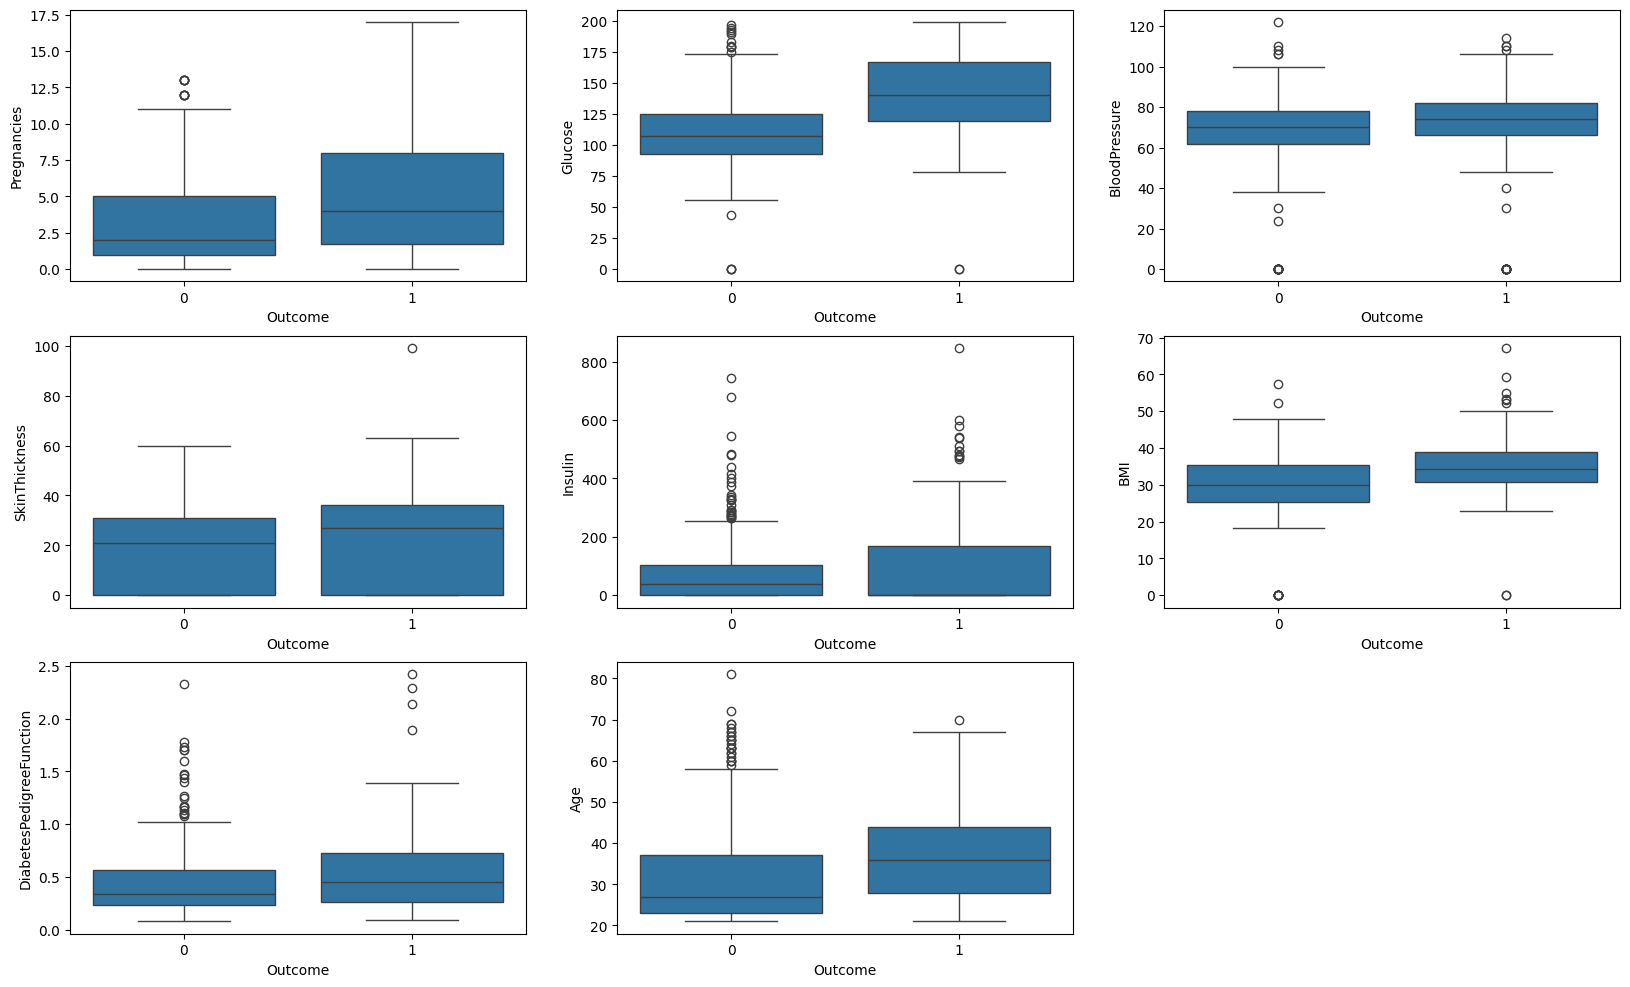

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='Outcome',y='Pregnancies',data=func)
plt.subplot(3,3,2)
sns.boxplot(x='Outcome',y='Glucose', data=func)
plt.subplot(3,3,3)
sns.boxplot(x='Outcome',y='BloodPressure', data=func)
plt.subplot(3,3,4)
sns.boxplot(x='Outcome',y='SkinThickness', data=func)
plt.subplot(3,3,5)
sns.boxplot(x='Outcome',y='Insulin', data=func)
plt.subplot(3,3,6)
sns.boxplot(x='Outcome',y='BMI', data=func)
plt.subplot(3,3,7)
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction', data=func)
plt.subplot(3,3,8)
sns.boxplot(x='Outcome',y='Age', data=func)
plt.show()





**TRAIN TEST SPLIT THE DATA**

In [ ]:
def train_test_split_and_features(func):
  y=func['Outcome']
  x=func.drop(['Outcome'],axis=1)
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
  print(x.head(5))
  print(x.columns)
  Sets=list(x.columns)
  return x_train,x_test,y_train,y_test,Sets

In [ ]:
x_train,x_test,y_train,y_test,Sets=train_test_split_and_features(func)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


**FIT AND EVALUATE MODEL**

In [ ]:
def fit_and_evaluate_model(x_train,x_test,y_train,y_test,max_depth=5,min_samples_split=0.01,max_features=0.8,max_samples=0.8):
    randomforest= RandomForestClassifier(random_state=0,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  max_features=max_features,
                                  max_samples=max_samples)
    model=randomforest.fit(x_train,y_train)
    randomforestpredict= randomforest.predict(x_test)
    randomforestconfusionmatrix= confusion_matrix(y_test,randomforestpredict)
    randomforestaccuracyscore= accuracy_score(y_test,randomforestpredict)
    print("confusion matrix")
    print(randomforestconfusionmatrix)
    print("\n")
    print("Accuracy of Random Forest:",randomforestaccuracyscore*100,"\n")
    print(classification_report(y_test,randomforestpredict))
    return model

In [ ]:
model = fit_and_evaluate_model(x_train,x_test,y_train,y_test)

confusion matrix
[[95 12]
 [19 28]]


Accuracy of Random Forest: 79.87012987012987 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.70      0.60      0.64        47

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.80      0.79       154



**DIFFERENT PARAMETERS TO IDENTIFY BEST ONES**

In [ ]:
param_grid=[
    {'max_depth':[4,6,8,10], 'min_samples_split':[0.01,0.03,0.07,0.1],
'max_features': [0.6,0.8,0.9,1.0],
'max_samples':[0.6,0.8,0.9,1.0]}]

In [ ]:
model = RandomForestClassifier()
search = GridSearchCV(estimator = model, param_grid = para_grid, cv=5, verbose=2)
search.fit(x_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01; total time=   0.2s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01; total time=   0.2s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01; total time=   0.2s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01; total time=   0.2s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01; total time=   0.2s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03; total time=   0.2s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03; total time=   0.2s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03; total time=   0.2s
[CV] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03; total time=   0.2s
[CV] END max_depth=3, max_features=0

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [0.7, 0.8, 0.9, 1.0],
                          'max_samples': [0.7, 0.8, 0.9, 1.0],
                          'min_samples_split': [0.01, 0.03, 0.07, 0.1]}],
             verbose=2)

In [ ]:
update = pd.DataFrame(search.cv_results_)
update.sort_values('mean_test_score',inplace=True,ascending=False)
update.head(11)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
215,0.144726,0.006144,0.006340,0.000497,10,0.8,0.8,0.1,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.715447,0.813008,0.796748,0.707317,0.803279,0.767160,0.045907,1
194,0.136777,0.002888,0.006060,0.000081,10,0.7,0.7,0.07,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.739837,0.804878,0.780488,0.707317,0.795082,0.765520,0.036590,2
71,0.134546,0.005283,0.006341,0.000469,5,0.7,0.8,0.1,"{'max_depth': 5, 'max_features': 0.7, 'max_sam...",0.723577,0.796748,0.788618,0.723577,0.795082,0.765520,0.034354,2
107,0.150385,0.003687,0.006578,0.000362,5,0.9,0.9,0.1,"{'max_depth': 5, 'max_features': 0.9, 'max_sam...",0.723577,0.813008,0.788618,0.715447,0.786885,0.765507,0.038760,4
8,0.159776,0.019436,0.008115,0.001088,3,0.7,0.9,0.01,"{'max_depth': 3, 'max_features': 0.7, 'max_sam...",0.739837,0.821138,0.788618,0.699187,0.778689,0.765494,0.042095,5
39,0.130455,0.003694,0.006846,0.001081,3,0.9,0.8,0.1,"{'max_depth': 3, 'max_features': 0.9, 'max_sam...",0.723577,0.813008,0.788618,0.723577,0.778689,0.765494,0.036001,5
199,0.197666,0.013645,0.013527,0.003006,10,0.7,0.8,0.1,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.723577,0.813008,0.772358,0.707317,0.803279,0.763908,0.042098,7
147,0.136627,0.002283,0.006325,0.000365,7,0.8,0.7,0.1,"{'max_depth': 7, 'max_features': 0.8, 'max_sam...",0.715447,0.804878,0.788618,0.715447,0.795082,0.763894,0.039894,8
87,0.167251,0.027469,0.007917,0.001729,5,0.8,0.8,0.1,"{'max_depth': 5, 'max_features': 0.8, 'max_sam...",0.731707,0.804878,0.772358,0.723577,0.786885,0.763881,0.031437,9
219,0.150223,0.005835,0.006195,0.000069,10,0.8,0.9,0.1,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.739837,0.796748,0.780488,0.715447,0.786885,0.763881,0.031013,9


In [ ]:
update_save= pd.DataFrame(search.cv_results_)
update_save.to_csv('update_save.csv',index=False)

In [ ]:
search.best_params_

{'max_depth': 10,
 'max_features': 0.8,
 'max_samples': 0.8,
 'min_samples_split': 0.1}

**EVALUATE THE MODEL WITH BEST PARAMETERS**

In [ ]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=10, min_samples_split=0.1,
                               max_features=0.8, max_samples=0.8)

confusion matrix
[[95 12]
 [21 26]]


Accuracy of Random Forest: 78.57142857142857 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
main= pd.DataFrame(model.feature_importances_)
main['features'] = features
main.columns = ['main','feature']
main.sort_values(by = 'main', ascending= True,inplace=True)

<BarContainer object of 8 artists>

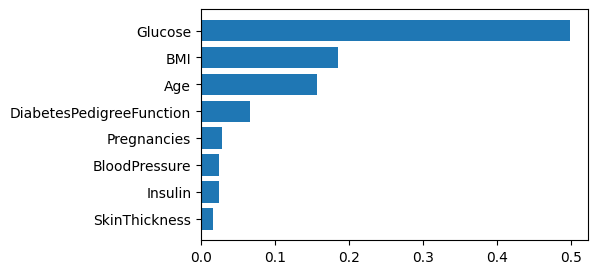

In [ ]:
plt.figure(figsize=(5,3))
plt.barh(main.feature,main.main)